In [1]:
#https://www.kesci.com/home/project/5e71dd6ec59d610036221337
import pandas as pd 
import numpy as np

In [14]:
path1 = 'C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/chipotle.tsv'

In [16]:
chi = pd.read_csv(path1,sep = '\t')

In [17]:
chi.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [19]:
chi.shape

(4622, 5)

In [20]:
chi.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [21]:
chi.index

RangeIndex(start=0, stop=4622, step=1)

In [31]:
item = chi[['quantity','item_name']]

In [35]:
most = item.groupby(by = 'item_name').agg({'quantity':sum})

In [38]:
most.sort_values('quantity',ascending=False).head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [40]:
#统计“item_name”列中不同值的个数，不包括null值
chi['item_name'].nunique()

50

In [41]:
#在choice_description中，下单次数最多的商品是什么？
chi['choice_description'].value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [44]:
#一共有多少商品被下单？
chi['quantity'].sum()

4972

In [46]:
#将item_price转换为浮点数
chi['item_price'] = chi['item_price'].apply(lambda x: float(x[1:-1]))

In [47]:
#在该数据集对应的时期内，收入(revenue)是多少
chi['total_income'] = round(chi['quantity'] * chi['item_price'],2)
chi['total_income'].sum()

39237.02

In [49]:
#在该数据集对应的时期内，一共有多少订单？
chi['order_id'].nunique()

1834

In [59]:
#每一单(order)对应的平均总价是多少？
chi[['order_id','total_income']].groupby(by = 'order_id').agg({'total_income':sum})['total_income'].mean()

21.394231188658654

In [61]:
#一共有多少种不同的商品被售出？
chi['item_name'].nunique()

50

In [1]:
#数据过滤与排序
import pandas as pd

In [7]:
path2 = "C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/Euro2012_stats.csv"
eruo = pd.read_csv(path2)

In [10]:
eruo.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [11]:
eruo.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
#有多少球队参与了2012欧洲杯？
eruo.shape
#16行，35列

(16, 35)

In [14]:
#该数据集中一共有多少列(columns)?
eruo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64
Crosses                       16 non-null int64
Dribbles                      16 non-null int64
Corners Taken                 16 non-null int64
Tackles                      

In [20]:
#将数据集中的列Team, Yellow Cards和Red Cards单独存为一个名叫discipline的数据框
discipline = eruo[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [21]:
#对数据框discipline按照先Red Cards再Yellow Cards进行排序
discipline = discipline.sort_values(['Red Cards','Yellow Cards'],ascending=False)
discipline

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [22]:
#round()方法返回 x 的小数点四舍五入到n个数字。
round(discipline['Yellow Cards'].mean())

7

In [25]:
#找到进球数Goals超过6的球队数据
eruo[eruo['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [26]:
#选取以字母G开头的球队数据
eruo[eruo['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [27]:
#选取前7列
eruo.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [28]:
#选取除了最后3列之外的全部列
eruo.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [29]:
#找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)
eruo.loc[eruo['Team'].isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [4]:
path3 = 'C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/drinks.csv'

In [5]:
import pandas as pd
drink = pd.read_csv(path3)

In [6]:
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [11]:
#哪个大陆(continent)平均消耗的啤酒(beer)更多？
drink.groupby('continent')['beer_servings'].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [12]:
#打印出每个大陆(continent)的红酒消耗(wine_servings)的描述性统计值
drink.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [14]:
#打印出每个大陆每种酒类别的消耗平均值
drink.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [15]:
# 打印出每个大陆每种酒类别的消耗中位数
drink.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


In [16]:
# 打印出每个大陆对spirit饮品消耗的平均值，最大值和最小值
drink.groupby('continent')['spirit_servings'].agg(['mean','max','min'])

,mean,max,min
continent,,,
AF,16.339623,152,0
AS,60.840909,326,0
EU,132.555556,373,0
OC,58.437500,254,0
SA,114.750000,302,25


In [17]:
import numpy as np
import pandas as pd

In [19]:
path4 = 'C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/US_Crime_Rates_1960_2014.csv'
crime = pd.read_csv(path4)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [20]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.3 KB


In [22]:
crime['Year'] = pd.to_datetime(crime['Year'],format = '%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


In [23]:
#将列Year设置为数据框的索引
crime = crime.set_index('Year',drop = True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [24]:
#删除名为Total的列
del crime['Total']

In [25]:
#根据限定的时间进行数据的聚合
crime.resample('10AS').sum()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [26]:
#注意Population这一列，若直接对其求和，是不正确的
population = crime['Population'].resample('10AS').max()

In [28]:
crime['Population'] = population

In [31]:
#何时是美国历史上生存最危险的年代？
#使用idxmax()函数来沿索引轴查找最大值的索引
crime.idxmax(0)

Population           2010-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [3]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [5]:
#将data1和data2两个数据框按照行的维度进行合并，命名为all_data
all_data = pd.concat([data1,data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [7]:
# 将data1和data2两个数据框按照列的维度进行合并，命名为all_data_col
all_data_col = pd.concat([data1,data2],axis =1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [8]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [10]:
#按照subject_id的值对all_data和data3作合并
df = pd.merge(all_data,data3, on ='subject_id')

In [11]:
df

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [12]:
#对data1和data2按照subject_id作连接
pd.merge(data1,data2, on = 'subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [13]:
# 找到 data1 和 data2 合并之后的所有匹配结果
pd.merge(data1,data2,on = 'subject_id',how = 'outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [15]:
path6 = 'C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/wind.data'

In [32]:
import datetime
data = pd.read_table(path6,sep='\s+',parse_dates=[[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [33]:
#2061年？我们真的有这一年的数据？创建一个函数并用它去修复这个bug
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)

In [34]:
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [35]:
#将日期设为索引，注意数据类型，应该是datetime64[ns]
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])
data = data.set_index('Yr_Mo_Dy')

In [36]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [38]:
#对应每一个location，一共有多少数据值缺失
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [39]:
#对应每一个location，一共有多少完整的数据值
data.shape[0] - data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [45]:
#对于全体数据，计算风速的平均值
data.mean().mean()

10.227982360836924

In [46]:
# 创建一个名为loc_stats的数据框去计算并存储每个location的风速最小值，最大值，平均值和标准差
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min() # min
loc_stats['max'] = data.max() # max 
loc_stats['mean'] = data.mean() # mean
loc_stats['std'] = data.std() # standard deviations
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125


In [50]:
#创建一个名为day_stats的数据框去计算并存储所有location的风速最小值，最大值，平均值和标准差
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [55]:
#对于每一个location，计算一月份的平均风速
data['date'] = data.index

data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)
data['day'] = data['date'].apply(lambda date: date.day)

january_winds = data.query('month == 1')

january_winds.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [52]:
#对于数据记录按照年为频率取样
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


In [53]:
#对于数据记录按照月为频率取样
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [58]:
path7 = 'C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/train.csv'
titanic = pd.read_csv(path7)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
#将PassengerId设置为索引
titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [63]:
#绘制一个展示男女乘客比例的扇形图
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

proportions = [males, females]

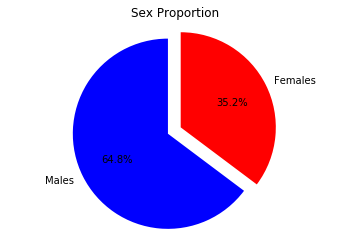

In [73]:
plt.pie(
    # using proportions
    proportions,
    # with the labels being officer names
    labels = ['Males', 'Females'], 
    # with no shadows
    shadow = False,   
    # with colors
    colors = ['blue','red'],   
    # with one slide exploded out
    explode = (0.15 , 0),    
    # with the start angle at 90%
    startangle = 90,
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Sex Proportion")
plt.show()

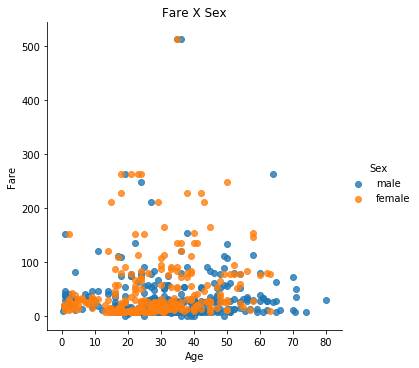

In [78]:
#绘制一个展示船票Fare, 与乘客年龄和性别的散点图
lm = sns.lmplot(x= 'Age',y = 'Fare',data = titanic, hue = 'Sex',fit_reg=False)
lm.set(title = 'Fare X Sex')


In [80]:
#有多少人生还？
titanic['Survived'].sum()

342

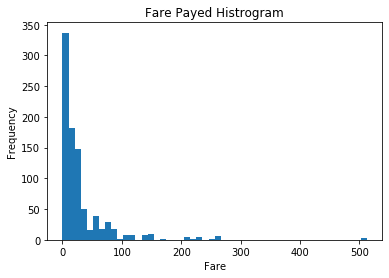

In [87]:
#绘制一个展示船票价格的直方图
df = titanic['Fare'].sort_values(ascending=False)
plt.hist(df,bins = 50)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()

In [88]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }


In [89]:
#将数据字典存为一个名叫pokemon的数据框中
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [90]:
# 数据框的列排序是字母顺序，请重新修改为name, type, hp, evolution, pokedex这个顺序
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [91]:
#添加一个列place
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


In [92]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

In [93]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [94]:
path9 = 'C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/Apple_stock.csv'
apple = pd.read_csv(path9)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [95]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [96]:
#将Date这个列转换为datetime类型
apple.Date = pd.to_datetime(apple.Date)
apple.Date.head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [99]:
#将Date设置为索引
apple = apple.set_index('Date')

In [108]:
#有重复的日期吗？
apple.index.is_unique

True

In [109]:
#将index设置为升序
apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [116]:
#数据集中最早的日期和最晚的日期相差多少天？
(apple.index.max() - apple.index.min()).days

12261

In [118]:
#在数据中一共有多少个月？
apple_months = apple.resample('BM').mean()
len(apple_months.index)

404

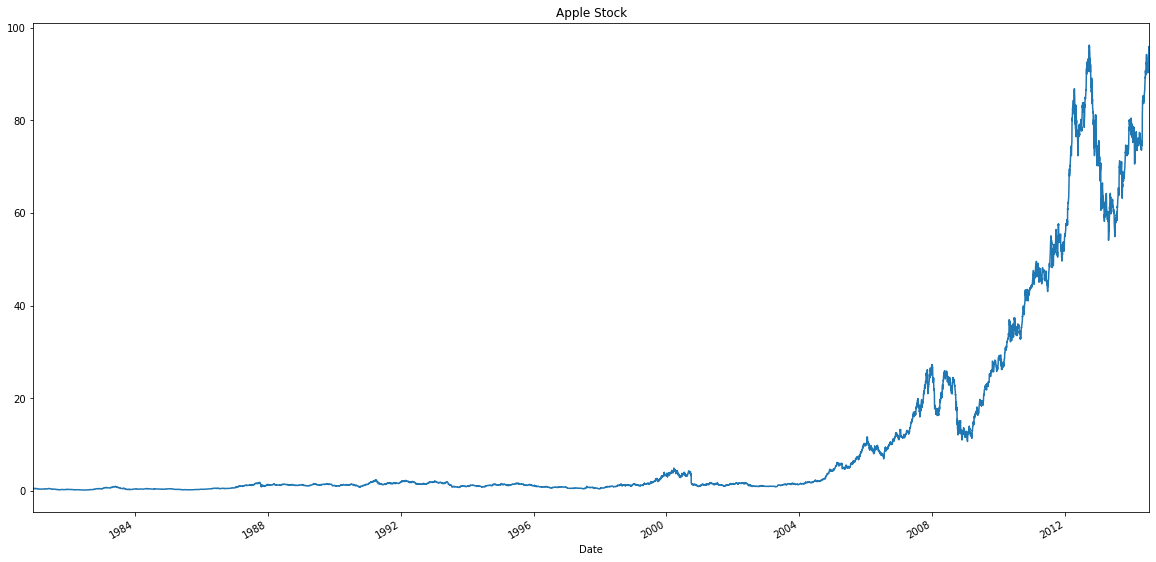

In [121]:
#按照时间顺序可视化Adj Close值
appl_open = apple['Adj Close'].plot(title = "Apple Stock")
fig = appl_open.get_figure()
fig.set_size_inches(20, 10)

In [122]:
import pandas as pd

In [123]:
path10 = 'C:/Users/REGGIE/Desktop/数据分析资料/exercise_data/iris.csv'
iris = pd.read_csv(path10)
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [125]:
iris = pd.read_csv(path10,  names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
#数据框中有缺失值吗？
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [127]:
#列petal_length的第10到19行设置为缺失值
iris.iloc[10:20,2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [129]:
iris.petal_length.fillna(1, inplace = True)
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [130]:
#删除列class
del iris['class']

In [131]:
#将数据框前三行设置为缺失值
iris.iloc[0:3,:] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [132]:
#删除有缺失值的行
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


In [133]:
# 重新设置索引
iris = iris.reset_index(drop = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
2,5.4,3.9,1.7,0.4
3,4.6,3.4,1.4,0.3
4,5.0,3.4,1.5,0.2
